## Data Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

train_data = pd.read_csv('data/train.csv')
print('Training data set: ' + str(len(train_data)))

train_data.head()

Training data set: 1306122


,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


## Data Wrangling

In [9]:
%%time

import contractions
import re
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
#nltk.download()
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize 
from nltk.corpus import  wordnet
from nltk.corpus import stopwords 

stop_words = set(stopwords.words('english'))

def remove_non_ascii(text):
    return ''.join(i for i in text if ord(i)<128)

def remove_white_space(text):
    return text.strip().strip('\t\n')

def remove_special_character(text):
    return re.sub('[^A-Za-z0-9\s]+', '', text)

def porter_stemmer(text): #PorterStemmer
    ps = PorterStemmer()
    text = ' '.join([ps.stem(word) for word in word_tokenize(text)])
    return text

def lemmatizer(text): 
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(text)])
    return text

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)
    
def remove_stop_word(text): 
    text = ' '.join([w for w in nltk.word_tokenize(text) if w not in stop_words])
    return text

train_data['question_text'] = train_data['question_text'].str.normalize('NFKD')\
.apply(remove_non_ascii).apply(remove_white_space).apply(contractions.fix).str.lower()\
.apply(remove_special_character).apply(remove_stop_word)

train_data['question_text_stem'] = train_data['question_text'].apply(porter_stemmer)
train_data['question_text_lemma'] = train_data['question_text'].apply(lemmatizer)

print('Training data set: ' + str(len(train_data)))
print(train_data.head())

[nltk_data] Downloading package punkt to /Users/yang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/yang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/yang/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
Training data set: 1306122
                    qid                                      question_text  \
0  00002165364db923c7e6      quebec nationalists see province nation 1960s   
1  000032939017120e6e44      adopted dog would encourage people adopt shop   
2  0000412ca6e4628ce2cf  velocity affect time velocity affect space geo...   
3  000042bf85aa498cd78e       otto von guericke used magdeburg hemispheres   
4  0000455dfa3e01eae3af  convert montra helicon mountain bike changing ...   

   target                               question_text_stem  \
0       0       quebec nationalist see provinc nation 1960   
1       0        adopt dog would encourag peopl adopt shop   
2       0    veloc affect time veloc affect space geometri   
3       0         otto von guerick use magdeburg hemispher   
4       0  convert montra helicon mountain bike chang tyre   

                                 question_text_lem

In [12]:
from joblib import dump
from joblib import load

filename = 'train_data.sav'
#dump(train_data, filename)
train_data = load(filename)

In [13]:
print(train_data.head())

                    qid                                      question_text  \
0  00002165364db923c7e6      quebec nationalists see province nation 1960s   
1  000032939017120e6e44      adopted dog would encourage people adopt shop   
2  0000412ca6e4628ce2cf  velocity affect time velocity affect space geo...   
3  000042bf85aa498cd78e       otto von guericke used magdeburg hemispheres   
4  0000455dfa3e01eae3af  convert montra helicon mountain bike changing ...   

   target                               question_text_stem  \
0       0       quebec nationalist see provinc nation 1960   
1       0        adopt dog would encourag peopl adopt shop   
2       0    veloc affect time veloc affect space geometri   
3       0         otto von guerick use magdeburg hemispher   
4       0  convert montra helicon mountain bike chang tyre   

                                 question_text_lemma  
0       quebec nationalist see province nation 1960s  
1        adopt dog would encourage people adopt 

In [ ]:

#all word cloud python
#positive word cloud python
#negative word cloud python

In [ ]:
#split dataset tf-idf & count 

## Bag Of Words Using Traiditonal Machine Learning 

### Grid Search for Algorithm (BernoulliNB)

### Grid Search for Algorithm (Logistic Regression)

### Grid Search for Algorithm (SVM)

### Grid Search for Algorithm (RandomForestClassifier)

### Grid Search for Algorithm (GradientBoostingClassifier)

## Classification Result Comparsion

0        102
1       7269
2      58489
3     160610
4     212013
5     206372
6     164868
7     124657
8      90888
9      66243
10     50134
11     37981
12     29432
13     22955
14     17383
15     13115
16      9635
17      7363
18      5897
19      4837
20      4063
Name: word_count, dtype: int64
0        38
1      2019
2     16447
3     46007
4     61099
5     59602
6     47305
7     35759
8     26528
9     19209
10    14537
11    10963
12     8489
13     6503
14     5059
15     3737
16     2751
17     2094
18     1699
19     1392
20     1146
Name: word_count, dtype: int64


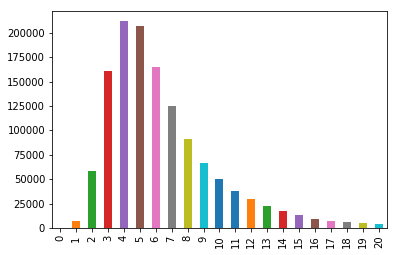

In [30]:
train_data.loc[(train_data.word_count <= 20),'word_count'].value_counts().sort_index().plot(kind='bar')
test_data.loc[(test_data.word_count <= 20),'word_count'].value_counts().sort_index().plot(kind='bar')
print(train_data.loc[(train_data.word_count <= 20),'word_count'].value_counts().sort_index())
print(test_data.loc[(test_data.word_count <= 20),'word_count'].value_counts().sort_index())

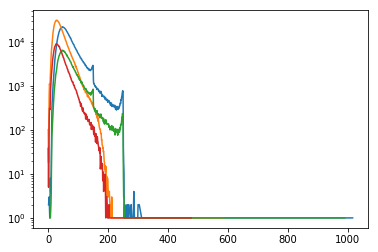

In [31]:
train_data['length'].value_counts().sort_index().plot(kind='line', logy=True)
train_data['length_after'].value_counts().sort_index().plot(kind='line')
test_data['length'].value_counts().sort_index().plot(kind='line')
test_data['length_after'].value_counts().sort_index().plot(kind='line')
plt.show()

In [32]:
%%time

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

train_text = train_data['question_text']
test_text = test_data['question_text']
train_target = train_data['target']
all_text = train_text.append(test_text)

count_vectorizer = CountVectorizer()
count_vectorizer.fit(all_text)


bag_of_words = count_vectorizer.transform(all_text)
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vectorizer.vocabulary_.items()]
word_check = pd.DataFrame(words_freq, columns=['word', 'count'])
sorted_word_check= word_check.sort_values('count', ascending=False)
print(sorted_word_check.head(30))
print(sorted_word_check.tail(30))

        word   count
11       not  134905
65       get  102421
8      would   81846
453     best   80252
10    people   73064
342     like   65812
156     make   60427
21       use   57468
105     good   50004
155      one   46321
337    india   42102
113    think   37712
287     year   37272
68       way   36043
107     take   35597
232     work   35148
15      time   35120
67        go   34620
98      know   34529
122     many   31454
137     life   30931
598     want   30828
336     much   30207
264  someone   29522
87      well   27153
33    become   26387
471  country   25622
562    start   25036
69      feel   24947
52     thing   24804
                              word  count
138200                    cockroch      1
138202                      altalt      1
138203           motivationrelated      1
138204                      modhol      1
138206                     arborio      1
138207              supertautology      1
138208                        leol      1
138210       

In [33]:
import datetime, time, psutil, os
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

<B>This is needed step as the above data wangling steps have the possible to create zero word question</B>

In [34]:
# remove records have no word after data wrangling
train_data = train_data.loc[(train_data.word_count > 0)]
test_data = test_data.loc[(test_data.word_count > 0)]
train_data= train_data.reset_index()
test_data = test_data.reset_index()

In [35]:
#  CONTROL PARAMTERS 
size = 0.1
tfTransform = True

train_data_full = train_data
test_data_full = test_data
train_data = train_data[: int(len(train_data) * size)]
test_data = test_data[:int(len(test_data) * size)]

In [36]:
train_text = train_data['question_text']
train_target = train_data['target']
test_text = test_data['question_text']
all_text = train_text.append(test_text)

In [37]:
%%time

count_vectorizer = CountVectorizer()
#count_vectorizer.fit(all_text)
#train_text_features_cv = count_vectorizer.transform(train_text)
#test_text_features_cv = count_vectorizer.transform(test_text)
train_text_features_cv = count_vectorizer.fit_transform(train_text)

CPU times: user 1.15 s, sys: 30.8 ms, total: 1.18 s
Wall time: 1.01 s


In [38]:
%%time

tfidf_vectorizer = TfidfVectorizer()
#tfidf_vectorizer.fit(all_text)
#train_text_features_tf = tfidf_vectorizer.transform(train_text)
#test_text_features_tf = tfidf_vectorizer.transform(test_text)
train_text_features_tf = tfidf_vectorizer.fit_transform(train_text)

CPU times: user 1.11 s, sys: 22.2 ms, total: 1.13 s
Wall time: 1.05 s


In [39]:
if tfTransform :
    train_text_features = train_text_features_tf
    #test_text_features = test_text_features_tf
else:
    train_text_features = train_text_features_cv
    #test_text_features = test_text_features_cv

print(train_text_features.shape)
print(train_target.shape)

(130602, 55941)
(130602,)


In [40]:
%%time

#BernoulliNB

kfold = KFold(n_splits = 5, shuffle = True, random_state = 1)
test_preds = 0
oof_preds = np.zeros([train_data.shape[0],])

for i, (train_idx,valid_idx) in enumerate(kfold.split(train_data)):
    x_train, x_valid = train_text_features[train_idx,:], train_text_features[valid_idx,:]
    y_train, y_valid = train_target[train_idx], train_target[valid_idx]
    classifier = BernoulliNB()
    classifier.fit(x_train,y_train)   
    oof_preds[valid_idx] = classifier.predict_proba(x_valid)[:,1]

pred_train = (oof_preds > 0.25).astype(np.int)
accuracy = f1_score(train_target, pred_train)
print(accuracy)

0.3638004594683295
CPU times: user 1.06 s, sys: 36.5 ms, total: 1.1 s
Wall time: 275 ms


In [41]:
%%time

#LogisticRegression

kfold = KFold(n_splits = 5, shuffle = True, random_state = 1)
test_preds = 0
oof_preds = np.zeros([train_data.shape[0],])

for i, (train_idx,valid_idx) in enumerate(kfold.split(train_data)):
    x_train, x_valid = train_text_features[train_idx,:], train_text_features[valid_idx,:]
    y_train, y_valid = train_target[train_idx], train_target[valid_idx]
    classifier = LogisticRegression(solver='liblinear')
    classifier.fit(x_train,y_train)
    oof_preds[valid_idx] = classifier.predict_proba(x_valid)[:,1]

pred_train = (oof_preds > 0.25).astype(np.int)
accuracy = f1_score(train_target, pred_train)
print(accuracy)

0.5157076611586441
CPU times: user 7.88 s, sys: 69.3 ms, total: 7.95 s
Wall time: 1.99 s


In [42]:
%%time

#GradientBoostingClassifier

kfold = KFold(n_splits = 5, shuffle = True, random_state = 1)
test_preds = 0
oof_preds = np.zeros([train_data.shape[0],])

for i, (train_idx,valid_idx) in enumerate(kfold.split(train_data)):
    x_train, x_valid = train_text_features[train_idx,:], train_text_features[valid_idx,:]
    y_train, y_valid = train_target[train_idx], train_target[valid_idx]
    classifier = GradientBoostingClassifier(random_state=1)
    classifier.fit(x_train,y_train)
   
    oof_preds[valid_idx] = classifier.predict_proba(x_valid)[:,1]

pred_train = (oof_preds > 0.25).astype(np.int)
accuracy = f1_score(train_target, pred_train)
print(accuracy)

0.4322752985543683
CPU times: user 1h 8min 41s, sys: 10 s, total: 1h 8min 51s
Wall time: 1h 4min 3s


### Apply Both CountVector and TfIdfVector,  Accuracy Reporting Using Confusion Matrix
<B>use classifier.predict instead of classifier.predict_proba in baseline for confusion matrix</B>

In [40]:
from sklearn.model_selection import train_test_split
train_text = train_data['question_text']
test_text = test_data['question_text']
train_target = train_data['target']
all_text = train_text.append(test_text)
X_train, X_test, y_train, y_test = train_test_split(train_text, train_target, test_size=0.20, random_state = 0)

In [48]:
%%time

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer, TfidfTransformer
import xgboost as xgb

# apply both cont vector & tf-idf vector 
count_vectorizer = CountVectorizer()
tfidf_transformer = TfidfTransformer()

# from X_train -> X_train_counts -> X_train_tfidf
X_train_count = count_vectorizer.fit_transform(train_text)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_count)

# fit model
data_dmatrix = xgb.DMatrix(data=X_train_tfidf,label=train_target)
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,'max_depth': 5, 'alpha': 10}
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=100,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)


CPU times: user 35.7 s, sys: 66.4 ms, total: 35.8 s
Wall time: 35.3 s


In [49]:
print(cv_results)

    train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0          0.461173        0.000032        0.461185       0.000036
1          0.427029        0.000235        0.427175       0.000217
2          0.397172        0.000106        0.397254       0.000277
3          0.371091        0.000274        0.371254       0.000605
4          0.348466        0.000230        0.348574       0.000577
5          0.328740        0.000386        0.329129       0.000745
6          0.312035        0.000404        0.312331       0.000746
7          0.297388        0.000464        0.297825       0.000858
8          0.284917        0.000524        0.285430       0.000953
9          0.274351        0.000523        0.274964       0.001002
10         0.265442        0.000604        0.266148       0.000989
11         0.257756        0.000533        0.258513       0.001110
12         0.251383        0.000545        0.252176       0.001210
13         0.246173        0.000539        0.246979       0.00

In [50]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

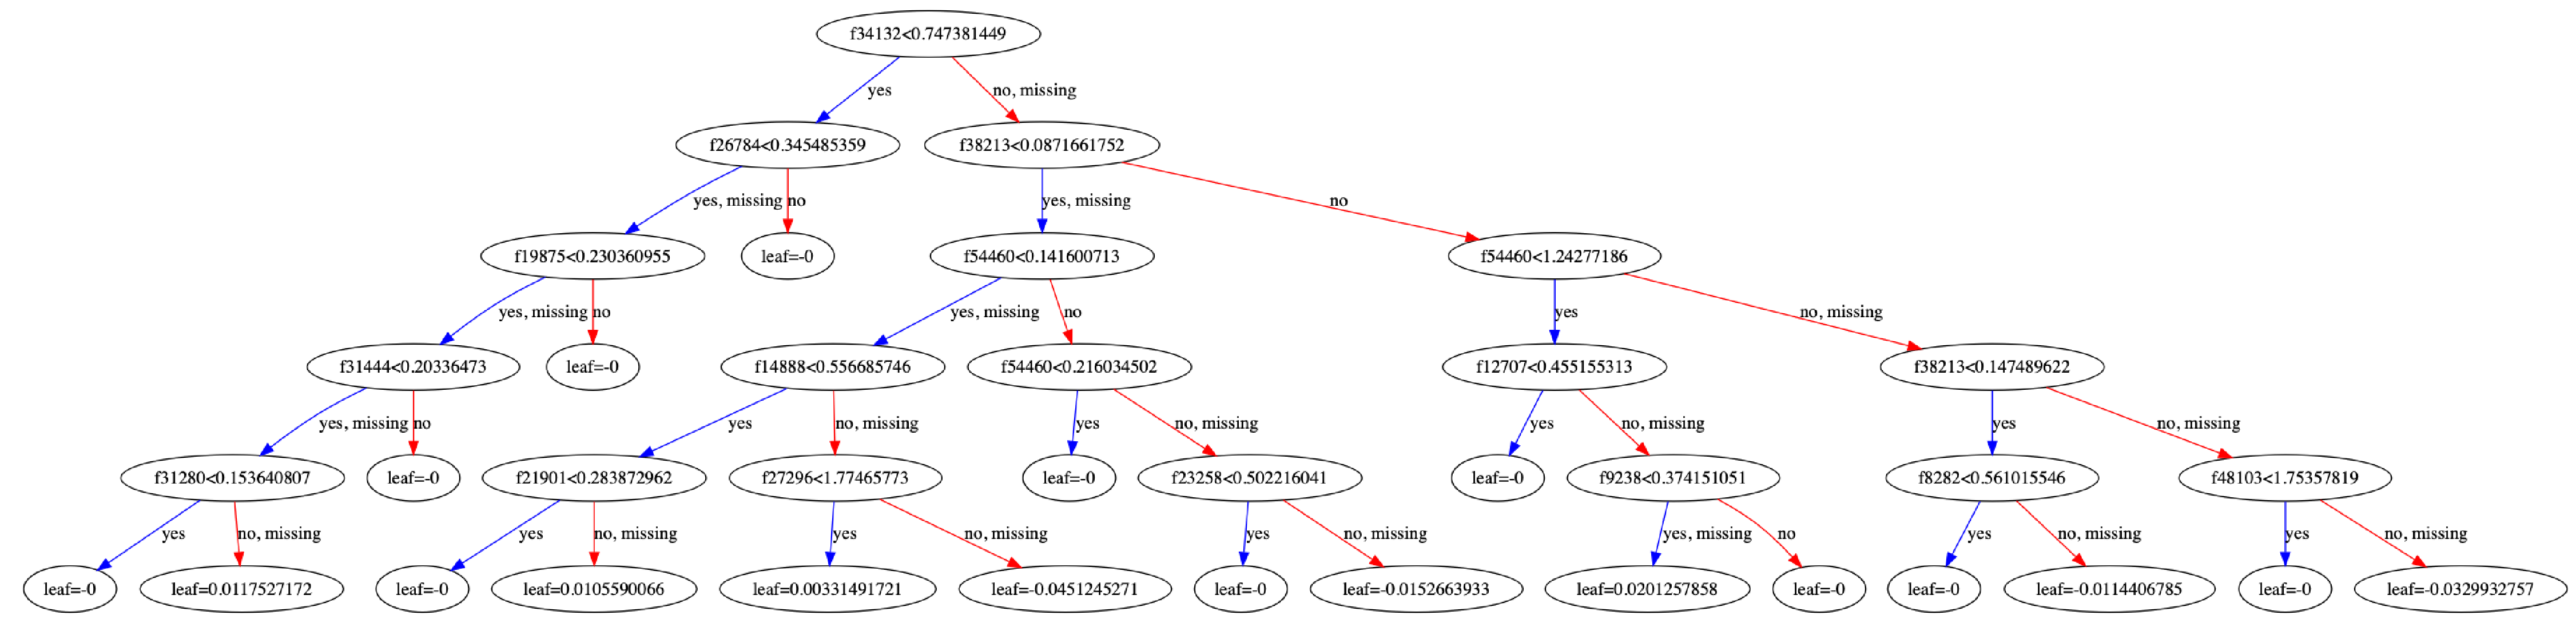

In [58]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [80, 30]
plt.show()

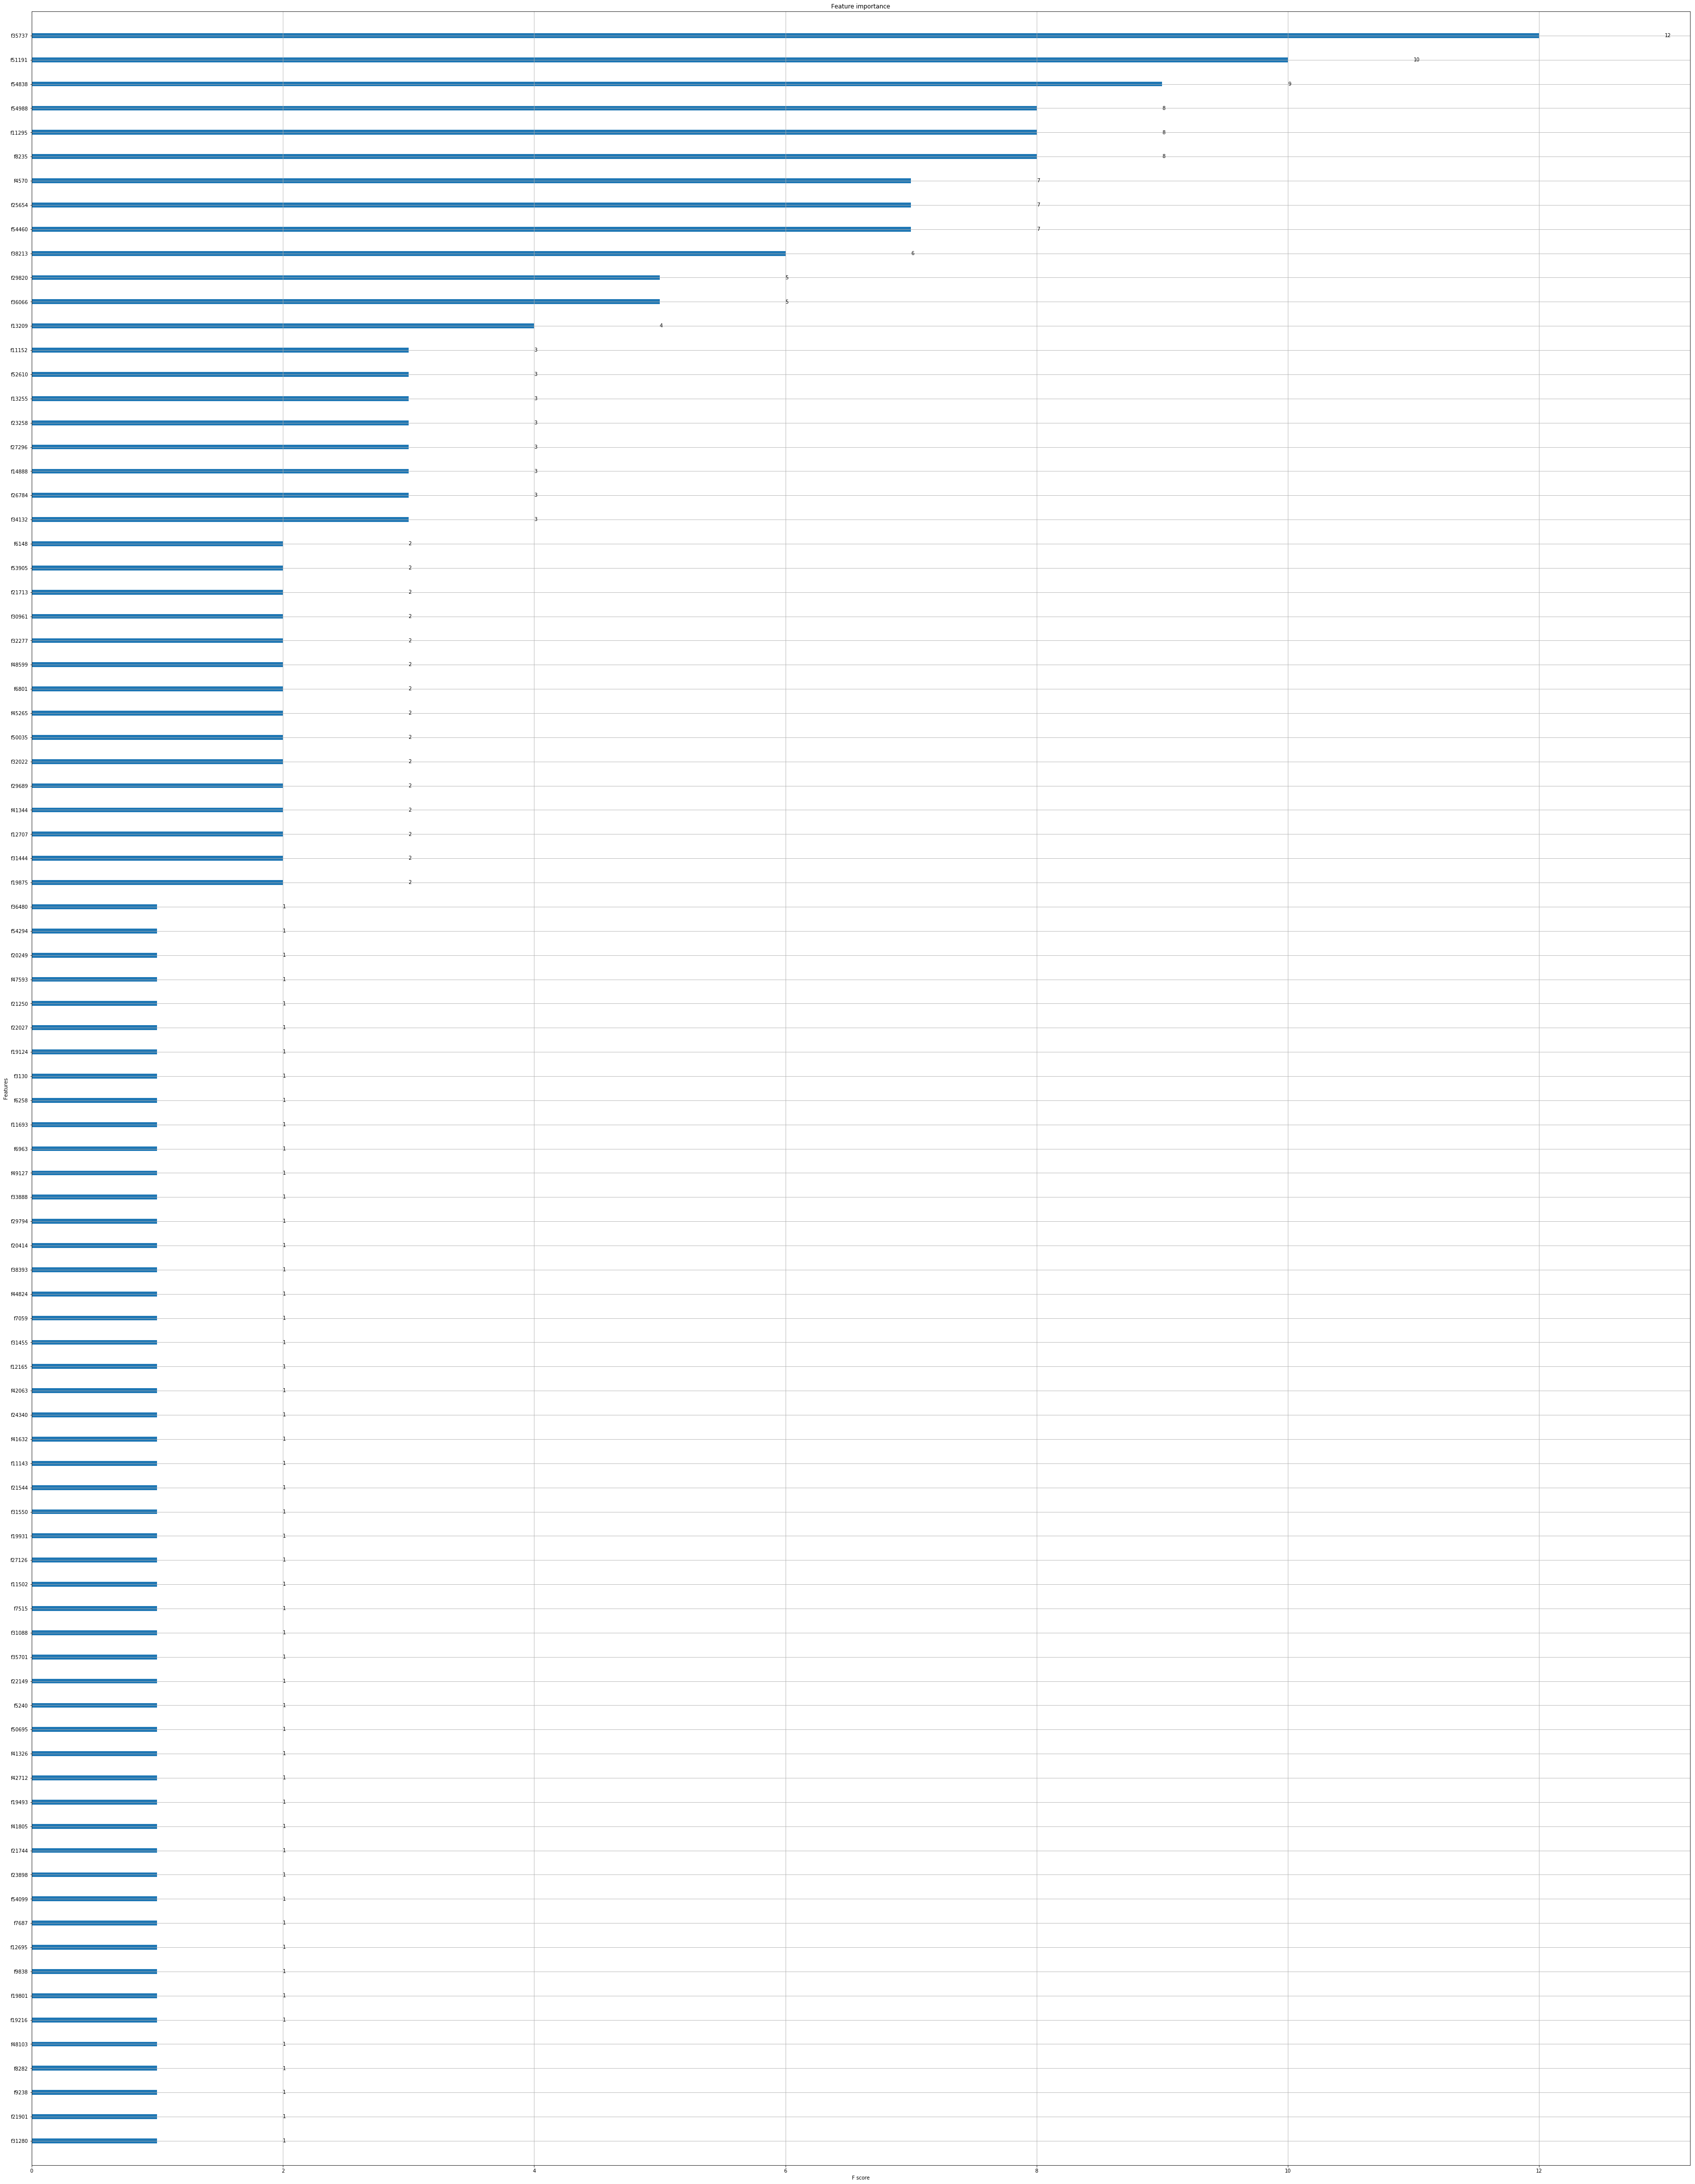

In [62]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [50, 80]
plt.show()

In [44]:
%%time

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

# apply both cont vector & tf-idf vector 
count_vectorizer = CountVectorizer()
tfidf_transformer = TfidfTransformer()

# from X_train -> X_train_counts -> X_train_tfidf
X_train_count = count_vectorizer.fit_transform(X_train)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_count)

# fit model
classifier1 = BernoulliNB().fit(X_train_tfidf, y_train)
classifier2 = LogisticRegression(solver='liblinear').fit(X_train_tfidf,y_train)
classifier3 = GradientBoostingClassifier(random_state=1).fit(X_train_tfidf,y_train)

X_test_count = count_vectorizer.transform(X_test)
x_test_tfidf = tfidf_transformer.transform(X_test_count)

y_pred1 = classifier1.predict(x_test_tfidf)
y_pred2 = classifier2.predict(x_test_tfidf)
y_pred3 = classifier3.predict(x_test_tfidf)

CPU times: user 1min 28s, sys: 523 ms, total: 1min 29s
Wall time: 28.4 s


[[24203   205]
 [ 1339   374]]
[[24210   198]
 [ 1286   427]]
[[24320    88]
 [ 1472   241]]


              precision    recall  f1-score   support

           0       0.95      0.99      0.97     24408
           1       0.65      0.22      0.33      1713

   micro avg       0.94      0.94      0.94     26121
   macro avg       0.80      0.60      0.65     26121
weighted avg       0.93      0.94      0.93     26121

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     24408
           1       0.68      0.25      0.37      1713

   micro avg       0.94      0.94      0.94     26121
   macro avg       0.82      0.62      0.67     26121
weighted avg       0.93      0.94      0.93     26121

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     24408
           1       0.73      0.14      0.24      1713

   micro avg       0.94      0.94      0.94     26121
   macro avg       0.84      0.57

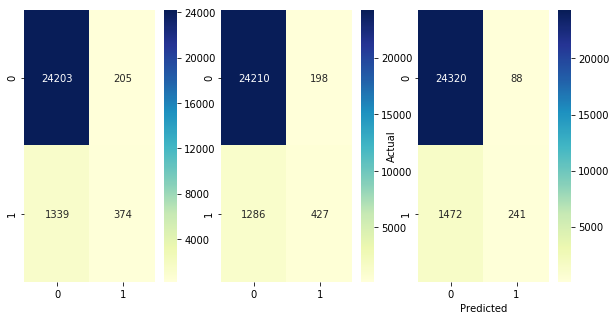

In [45]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

conf_mat1 = confusion_matrix(y_test, y_pred1)
conf_mat2 = confusion_matrix(y_test, y_pred2)
conf_mat3 = confusion_matrix(y_test, y_pred3)

print(conf_mat1)  
print(conf_mat2)  
print(conf_mat3)  
print('\n')
print(classification_report(y_test,y_pred1))  
print(classification_report(y_test,y_pred2))  
print(classification_report(y_test,y_pred3))  
print('\n')
print(accuracy_score(y_test, y_pred1))  
print(accuracy_score(y_test, y_pred2))  
print(accuracy_score(y_test, y_pred3))  
print('\n')

fig, axes = plt.subplots(1, 3, figsize=(10, 5), sharex=True)
sns.heatmap(conf_mat1, annot=True, fmt='d', cmap="YlGnBu", ax=axes[0])
sns.heatmap(conf_mat2, annot=True, fmt='d', cmap="YlGnBu", ax=axes[1])
sns.heatmap(conf_mat3, annot=True, fmt='d', cmap="YlGnBu", ax=axes[2])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()